<a href="https://colab.research.google.com/github/ramon-santana-silva/ML_NaoSupervisonado/blob/main/Clustering_Playground.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Contextualization

![](https://github.com/cmcouto-silva/figures/blob/main/ML_diagram_clustering.png?raw=true)

**Aprendizado não-supervisionado (unsupervised learning)**

No aprendizado não supervisionado, do qual **clustering** faz parte, **não há variável resposta**, e entre seus objetivos estão o tratamento, exploração e diagnóstico dos dados (exemplo: encontrar padrões).

**Exemplos:**
- **Clustering:** identificar e agrupar observações similares.
- **Dimensionality reduction:** reduzir a quantidade de dimensões (variáveis).

**Quantos algoritmos não-supervisionados temos?**

- Clustering: [https://scikit-learn.org/stable/modules/clustering.html](https://scikit-learn.org/stable/modules/clustering.html)
- Dimentionality reduction: [https://scikit-learn.org/stable/modules/classes.html#module-sklearn.decomposition](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.decomposition)

**Classifique como tarefa supervisionada ou não-supervisionada:**

1. Segmentação de clientes para entendermos melhor diferentes perfis: ________
2. Classificação de clientes em churn e não-churn: ________
3. Agrupamento de produtos similares entre si: ________
4. Redução da dimensionalidade dos dados: ________
5. Previsão da probabilidade de um cliente contratar o serviço: ________

<details>
  <summary><b>Respostas</b></summary>
  <ol type="1">
  <li><b>unsupervised learning</b></li>
  <li>supervised learning</li>
  <li><b>unsupervised learning</b></li>
  <li><b>unsupervised learning</b></li>
  <li>supervised learning</li>
  </ol>
</details>


# Setup

In [1]:
!pip install prince
!pip install kmodes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 414.6/414.6 kB 20.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Data wrangling
import re
import glob
import numpy as np
import pandas as pd

# Dataviz
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from yellowbrick.cluster import kelbow_visualizer
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance

## -- Machine learning -- ##
from sklearn import datasets
from sklearn.cluster import KMeans, DBSCAN, MeanShift, AgglomerativeClustering
from sklearn.cluster import k_means, dbscan, mean_shift, estimate_bandwidth
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale, minmax_scale, MinMaxScaler

from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

import prince                               # factor analysis (including categorical data)
from kmodes.kmodes import KModes            # clustering categorical data
from kmodes.kprototypes import KPrototypes  # clustering mixed data

# Didatic purposes
import string
from ipywidgets import interact

In [3]:
# https://matplotlib.org/stable/tutorials/introductory/customizing.html
sns.set_theme(
    context='talk',
    style='ticks',
    font_scale=.8,
    palette='bright',
    rc={
        'figure.figsize': (11,6),
        'axes.grid': True,
        'grid.alpha': .2,
        'axes.titlesize': 'x-large',
        'axes.titleweight': 'bold',
        'axes.titlepad': 20,
    }
)

scatter_kwargs = dict(palette='viridis', alpha=0.8, linewidth=0)

# K-means

App de simulação:
- [Versão em português (streamlit)](https://cmcouto-silva-kmeans-app-pt-streamlit-app-tyl62y.streamlitapp.com/)
- ~[Versão em português (dash)](https://kmeans-animation-pt.herokuapp.com/)~
- [Versão em inglês](https://cmcouto-silva-kmeans-app-en-streamlit-app-v886a2.streamlitapp.com/)

**Requerimentos:**
- Dados numéricos contínuos
- Dados na mesma escala
- Pré-determinação do número de grupos (k)

**Vantagens:**
- Simples
- Eficiente
- Escalável para uma grande quantidade de dados

**Desvantagens:**
- Sensível a outliers
- Pré-determinação do número de grupos (k)
- Não adequado para dados categóricos (mesmo com one-hot encoding)
- Não adequado para dados com estrutura complexa e não-linear.

Fontes:
- [https://www.ibm.com/support/pages/clustering-binary-data-k-means-should-be-avoided](https://www.ibm.com/support/pages/clustering-binary-data-k-means-should-be-avoided)
- Livro: Practical Statistics for Data Scientists (Peter Bruce et al., 2020)
- Statistical foruns

## Simulated Data

In [4]:
# Simulate clusters
X,y = datasets.make_blobs(n_samples=int(5E3), n_features=2, centers=4, cluster_std=.8, random_state=0)
df = pd.DataFrame(X, columns=list(string.ascii_uppercase[:X.shape[1]]))
df.head()

A         B
0  1.998996  1.535900
1 -2.788784  2.773154
2 -0.956255  3.630438
3  2.777738 -1.508286
4  0.982364  5.013279

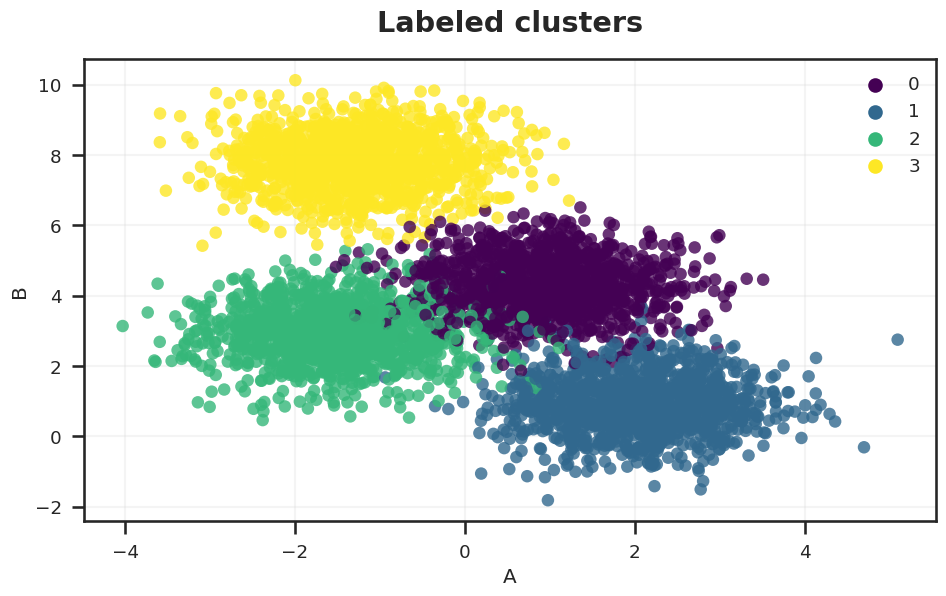

In [5]:
# Visualize simulated clusters
sns.scatterplot(data=df, x='A', y='B', hue=y, **scatter_kwargs)
plt.title('Labeled clusters')
plt.show()

## Distinct APIs for K-means

No sklearn, podemos utilizar algoritmos de clusterização através de classes ou funções (vide [este link](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.cluster)).

In [6]:
# Usando função
centroids, labels, inertia = k_means(X, n_clusters=2, random_state=0)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [7]:
# Using KMeans
model = KMeans(n_clusters=2, random_state=0)
model.fit(X)

centroids = model.cluster_centers_
labels = model.labels_
intertia = model.inertia_

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## Model evaluation

Uma boa clusterização vai produzir:
- Alta similaridade intra-cluster
- Pouca similaridade entre clusters

Métricas:
- Inércia
- Silhouette
- Davies Bouldin (`intracluster / intercluster`)
- Calinski Harabasz (`soma_intercluster / soma_intracluster`)

Exemplo de aplicação:

In [8]:
print(
  silhouette_score(X, labels),
  davies_bouldin_score(X, labels),
  calinski_harabasz_score(X, labels),
  sep='\n'
)

0.515911480826198
0.6225299776282515
6401.924184343904


Testando distintos agrupamentos:

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

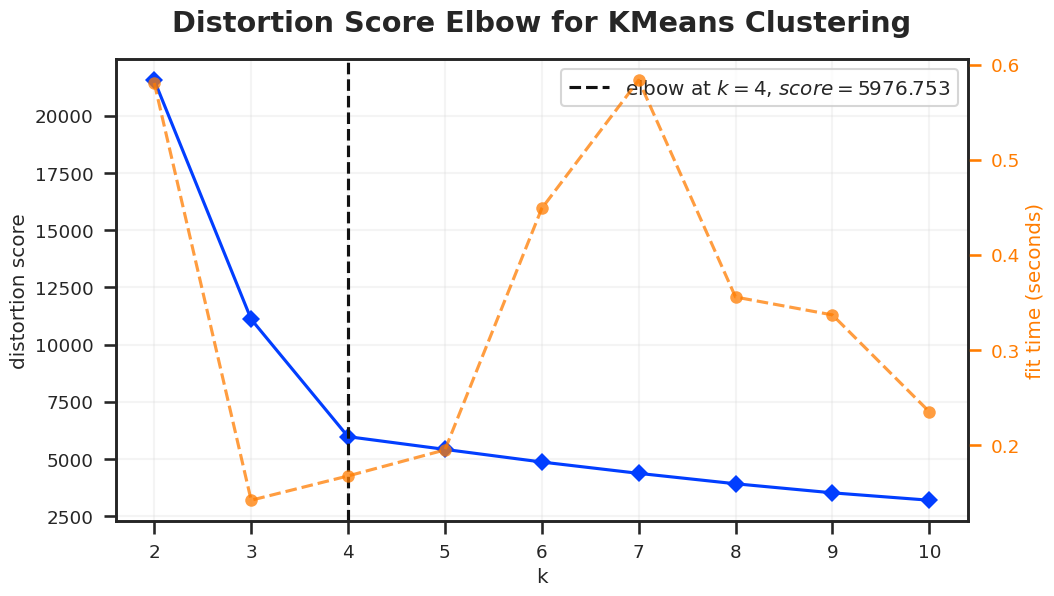

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [9]:
visualizer = KElbowVisualizer(KMeans(random_state=0), k=(2,11))
visualizer.fit(X).show()

In [10]:
cluster_metrics = silhouette_score, davies_bouldin_score, calinski_harabasz_score
cluster_metrics_results = []

for k in range(2,11):
  model = KMeans(n_clusters=k, random_state=0)
  labels = model.fit_predict(X)
  cluster_results_dict = {'k':k}
  cluster_results_dict['inertia'] = model.inertia_
  for metric in cluster_metrics:
    cluster_results_dict[metric.__name__] = metric(X, labels)
  cluster_metrics_results.append(cluster_results_dict)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

In [11]:
pd.DataFrame(cluster_metrics_results).set_index('k').style.background_gradient(cmap='Blues')

In [12]:
(
  pd.DataFrame(cluster_metrics_results)
  .set_index('k').style.background_gradient(cmap='Oranges', subset='inertia')
  .highlight_max(subset='silhouette_score')
  .highlight_min(subset='davies_bouldin_score')
)

Repetindo procedimento acima com dados simulados aleatórios:

In [13]:
X_random = np.random.rand(*X.shape)

In [14]:
cluster_metrics = silhouette_score, davies_bouldin_score
cluster_metrics_results = []

for k in range(2,11):
  model = KMeans(n_clusters=k, random_state=0)
  labels = model.fit_predict(X_random)
  cluster_results_dict = {'k':k}
  cluster_results_dict['inertia'] = model.inertia_
  for metric in cluster_metrics:
    cluster_results_dict[metric.__name__] = metric(X, labels)
  cluster_metrics_results.append(cluster_results_dict)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

In [15]:
pd.DataFrame(cluster_metrics_results).set_index('k').style.background_gradient(cmap='Greys')

Comparando de forma interativa:

In [16]:
@interact(k=(2,11), data=['X','X_random'])
def plot_kmeans(k, data):
  data = X if data=='X' else X_random
  model = KMeans(n_clusters=k, random_state=0)
  labels = model.fit_predict(data)
  sns.scatterplot(x=data[:,0], y=data[:,1], hue=labels, **scatter_kwargs)
  plt.show()

interactive(children=(IntSlider(value=6, description='k', max=11, min=2), Dropdown(description='data', options…

## High dimensional data

In [17]:
# Simulate clusters with high dimensional data
X_dim,y_dim = datasets.make_blobs(n_samples=int(1E3), n_features=10, centers=4, cluster_std=.8, random_state=0)
df_dim = pd.DataFrame(X_dim, columns=list(string.ascii_uppercase[:X_dim.shape[1]]))
df_dim.head()

A         B         C         D          E         F         G  \
0   1.375988  3.328840  2.252246  0.163276  -2.048389  1.498086 -1.626945   
1  -4.778629  5.591210 -0.834382  0.333095 -10.125881  3.179277  2.914841   
2  11.184614  5.196295 -0.802285  5.042595  -7.432989  3.606461 -7.730530   
3   9.696156  5.280882 -1.214031  4.589872  -8.312332  3.070013 -6.423507   
4  -4.262755  4.842532 -0.878987  1.944770  -8.669946  2.534408  2.236930   

          H         I         J  
0  7.672603  9.713141 -2.330450  
1  1.443623  9.603470  5.607201  
2  8.711666  1.110940 -1.709037  
3  9.210979  1.207334 -1.770543  
4  0.444544  8.682765  3.178775

In [18]:
pca = PCA()
pca_components = pca.fit_transform(df_dim)
df_pca = pd.DataFrame(pca_components, columns=[f'PC{i+1}' for i in range(df_dim.shape[1])])
display(df_pca)

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0    -5.856883  3.122523  6.136654 -0.686487  0.347968 -0.618029 -0.467717   
1   -11.436590 -6.559320 -4.410817 -1.239685 -0.029943  1.017996  0.895097   
2     6.443283  9.334398 -3.091811 -1.298623 -0.771382  0.358402  0.372171   
3     5.114664  8.403564 -3.589742 -1.178399 -0.325189 -0.178110 -0.224107   
4   -10.328252 -5.222973 -3.462066  0.586746 -0.655750  1.066886 -0.717080   
..         ...       ...       ...       ...       ...       ...       ...   
995  -6.590360  3.422836  6.599212 -1.688134  0.281325  0.597289  0.406577   
996  -7.330300  3.541334  4.587332  0.810124  1.054155 -1.566163 -0.340734   
997  -6.411780  5.056657  5.401471  0.665292  0.160854 -0.069270 -0.404070   
998  -9.947851 -4.739351 -3.272195  0.732262 -0.496340 -0.558349 -0.108244   
999 -12.395296 -5.550093 -4.717704 -1.373181  0.418618 -0.051257  0.885229   

          PC8       PC9      PC10  
0   -0.505754 -0.563464  0.814840  
1   -0.878642 -0.584850 -0.537870  
2   -0.301598 -1.050753  0.198899  
3   -0.534450  0.190508  0.744221  
4    0.606951 -1.759044  0.041215  
..        ...       ...       ...  
995  0.046039  0.643861 -0.928400  
996 -0.499334 -1.155100 -0.353791  
997  0.207449  0.184674  0.605232  
998  0.305074 -0.048046 -0.388834  
999  1.219924 -1.989002  0.074100  

[1000 rows x 10 columns]

In [19]:
pca.explained_variance_ratio_.cumsum()

array([0.55329463, 0.86083646, 0.96928936, 0.97418833, 0.97895301,
       0.98346233, 0.98785112, 0.99213323, 0.99621909, 1.        ])

In [20]:
pd.DataFrame(
    {'explained_var': pca.explained_variance_ratio_, 'explained_var_cumsum': pca.explained_variance_ratio_.cumsum()},
    index=df_pca.columns
).style.format('{:.2%}')

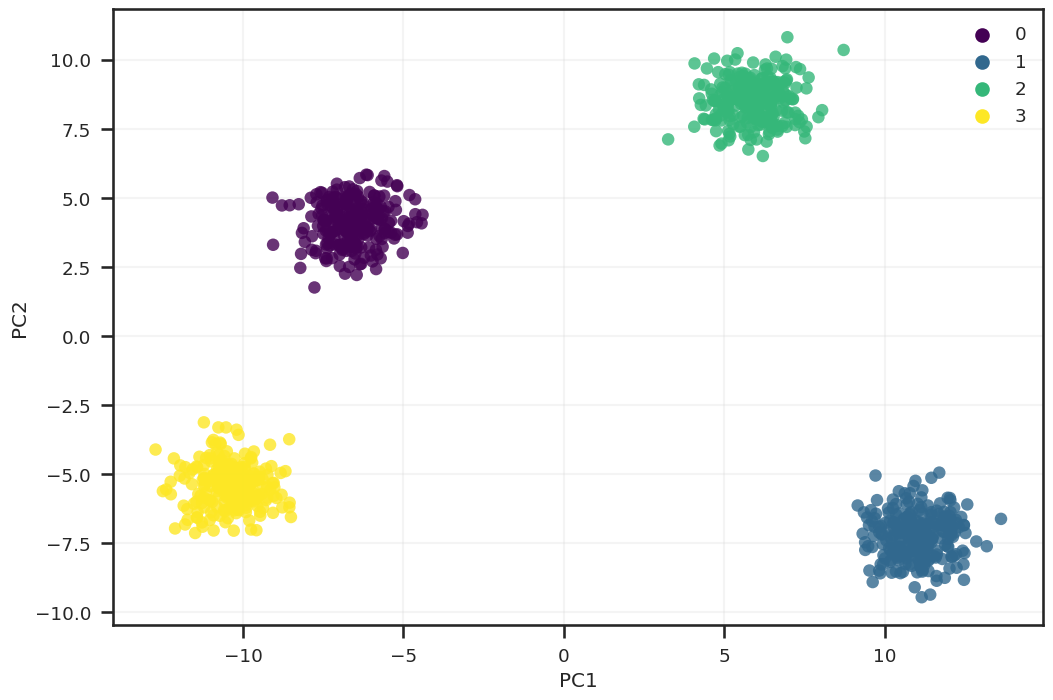

In [ ]:
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue=y_dim, **scatter_kwargs);

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


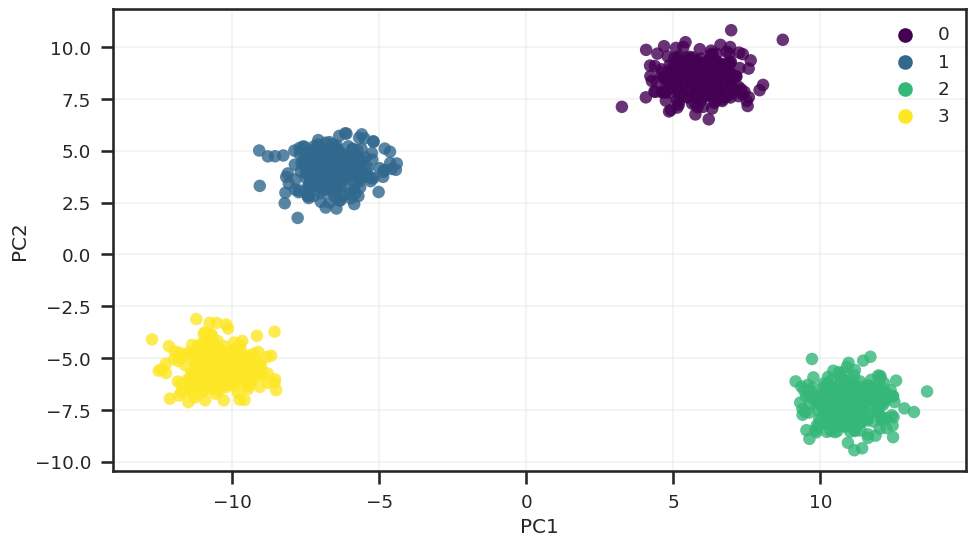

In [21]:
labels = k_means(df_pca, 4)[1]
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue=labels, **scatter_kwargs);

In [22]:
px.scatter_3d(data_frame=df_pca, x='PC1', y='PC2', z='PC3', color=labels.astype(str), template='plotly_dark')

# Hierarchical clustering

**Tipos:**
- Agglomerative (bottom-up)
- Dissimilarity (top-down)

**Vantagens:**
- Fácil interpretação
- Não é necessário estabelecer a quantidade de grupos previamente
- Pode ser usada com diferentes métodos de agrupamento e critérios de distância.

**Desvantagens:**
- Não escala bem com muitos dados
- Sensível ao método e métrica de distância selecionados
- Dendograma fica com visualização inviável para muitas amostras
 

In [23]:
# Simulate clusters
X,y = datasets.make_blobs(n_samples=80, n_features=2, centers=4, cluster_std=.8, random_state=0)
df = pd.DataFrame(X, columns=list(string.ascii_uppercase[:X.shape[1]]))
df.head()

A         B
0 -1.864189  8.266859
1 -0.020383  1.839675
2 -1.114917  8.343485
3  2.427797 -0.331331
4 -1.288313  3.978991

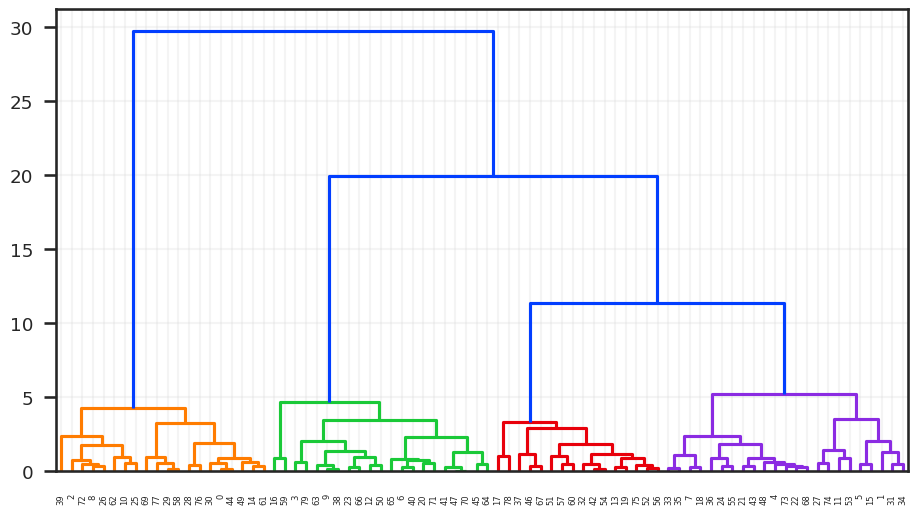

In [25]:
Z = linkage(df, method='ward')
dendrogram_dict = dendrogram(Z, color_threshold=7)
plt.show()

In [26]:
fcluster(Z, 4, criterion='maxclust')

array([1, 4, 1, 2, 4, 4, 2, 4, 1, 2, 1, 4, 2, 3, 1, 4, 2, 3, 4, 3, 2, 4,
       4, 2, 4, 1, 1, 4, 1, 1, 1, 4, 3, 4, 4, 4, 4, 3, 2, 1, 2, 2, 3, 4,
       1, 2, 3, 2, 4, 1, 2, 3, 3, 4, 3, 4, 3, 3, 1, 2, 3, 1, 1, 2, 2, 2,
       2, 3, 4, 1, 2, 2, 1, 4, 4, 3, 1, 1, 3, 2], dtype=int32)

# MeanShift

**Vantagens:**
- Possui apenas um parâmetro principal (bandwidth)
- Não necessita especificar a quantidade de clusters (também pode ser desvantagem)

**Desvantagens:**
- Computacionalmente custoso com grande volume de dados
- O resultado pode ser sensível ao valor de banda escolhido
- A escolha de um bom valor de banda pode ser difícil em algumas situações

In [27]:
# Simulate clusters
X,y = datasets.make_blobs(n_samples=int(1E3), n_features=2, centers=4, cluster_std=.8, random_state=0)
df = pd.DataFrame(X, columns=list(string.ascii_uppercase[:X.shape[1]]))
df.head()

A         B
0 -2.256086  7.858356
1  0.568548  3.953328
2 -2.602152  8.418937
3 -2.625338  2.063689
4  2.286564  1.227960

In [28]:
estimate_bandwidth(X)

2.822735629625506

In [29]:
model = MeanShift(n_jobs=-1)
model.fit(X)

MeanShift(n_jobs=-1)

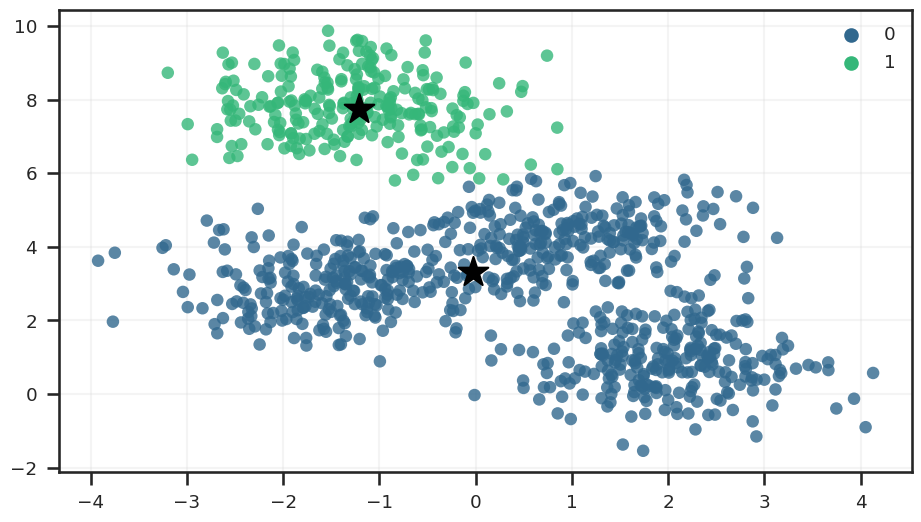

In [30]:
labels = model.predict(X)
ax = sns.scatterplot(x=X[:,0], y=X[:,1], hue=labels, **scatter_kwargs)
ax.scatter(*model.cluster_centers_.T, marker='*', s=500, color='black')

In [31]:
print(silhouette_score(X, labels))
print(davies_bouldin_score(X, labels))

0.5324827970890266
0.5812242300026665


In [32]:
@interact(bandwidth=(0.1, 3, 0.01))
def custom_meanshift(bandwidth):
  model = MeanShift(bandwidth=bandwidth, n_jobs=-1).fit(X)
  labels = model.predict(X)
  ax = sns.scatterplot(x=X[:,0], y=X[:,1], hue=labels, **scatter_kwargs)
  ax.scatter(*model.cluster_centers_.T, marker='*', s=500, color='black')
  plt.show()

interactive(children=(FloatSlider(value=1.55, description='bandwidth', max=3.0, min=0.1, step=0.01), Output())…

# DBSCAN

**Requisitos:**
- Especificar o raio mínimo de um cluster
- Especificar a quantidade mínima de pontos para formar uma cluster

**Vantagens:**
- Detecta clusters de formatos variados (densos)
- Não necessita especificar a quantidade de clusters
- Robusto aos outliers e distribuições não uniformes

**Desvantagens:**
- É sensível à densidade dos dados
- A escolha dos parâmetros pode ser difícil em algumas situações
- Não funciona bem em clusters com densidades diferentes (OPTICS)

In [33]:
# Simulate clusters
X,y = datasets.make_blobs(n_samples=int(5E3), n_features=2, centers=4, cluster_std=.8, random_state=0)
df = pd.DataFrame(X, columns=list(string.ascii_uppercase[:X.shape[1]]))
df.head()

A         B
0  1.998996  1.535900
1 -2.788784  2.773154
2 -0.956255  3.630438
3  2.777738 -1.508286
4  0.982364  5.013279

In [34]:
# Train DBSCAN
model = DBSCAN()
labels = model.fit_predict(X)

In [35]:
# Train DBSCAN (function)
labels = dbscan(X)[1]

In [36]:
@interact(eps=(0.01, 1, 0.01), min_samples=(1,20))
def custom_dbscan(eps, min_samples):
  _,labels = dbscan(X, eps=eps, min_samples=min_samples)
  sns.scatterplot(x=X[:,0], y=X[:,1], hue=labels, **scatter_kwargs)
  plt.show()

interactive(children=(FloatSlider(value=0.5, description='eps', max=1.0, min=0.01, step=0.01), IntSlider(value…

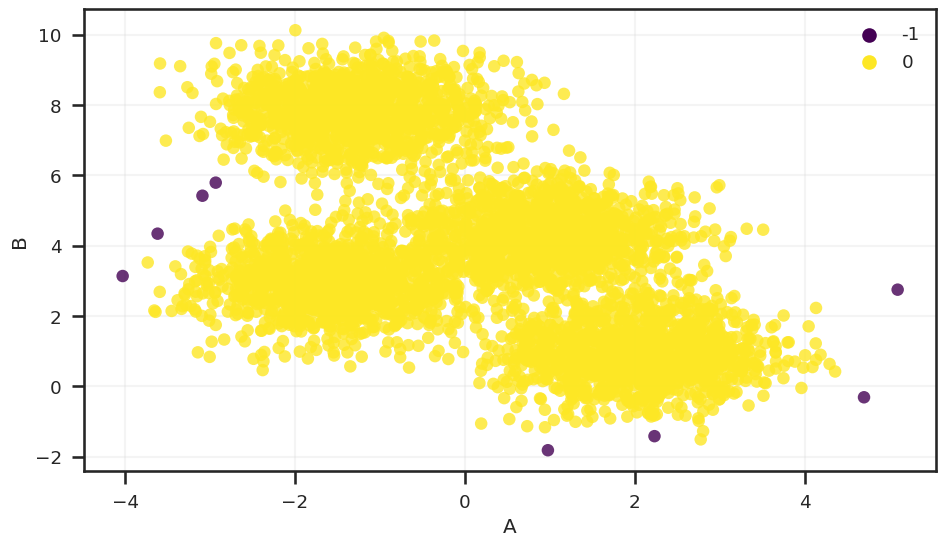

In [37]:
# Visualize output
sns.scatterplot(data=df, x='A', y='B', hue=labels, **scatter_kwargs);

In [ ]:
@interact(eps=(0.01,1, 0.01), min_samples=(1,20))
def custom_dbscan(eps, min_samples):
  _, labels = dbscan(X, eps=eps, min_samples=min_samples)
  sns.scatterplot(data=df, x='A', y='B', hue=labels, palette='tab10')
  plt.show()

interactive(children=(FloatSlider(value=0.5, description='eps', max=1.0, min=0.01, step=0.01), IntSlider(value…

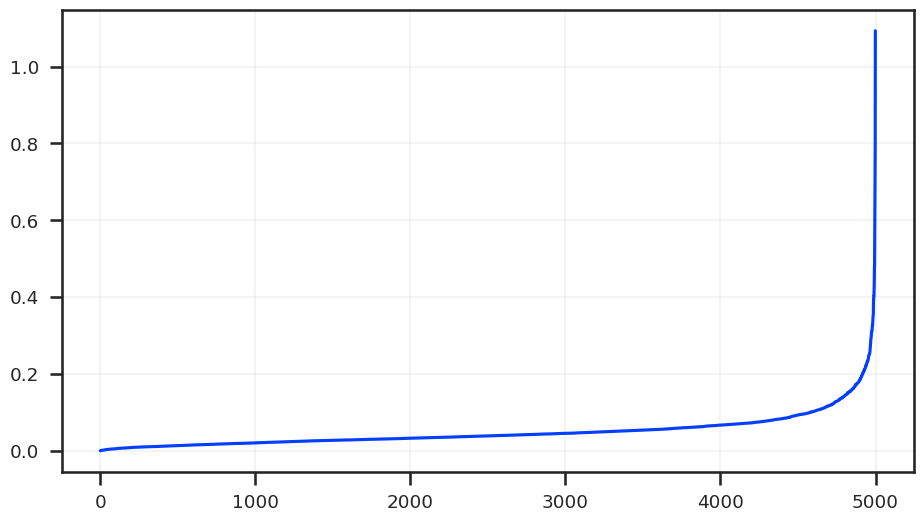

In [38]:
# https://towardsdatascience.com/machine-learning-clustering-dbscan-determine-the-optimal-value-for-epsilon-eps-python-example-3100091cfbc
from sklearn.neighbors import NearestNeighbors
nn_model = NearestNeighbors(n_neighbors=2).fit(X)
distances, indices = nn_model.kneighbors(X)
distances = np.sort(distances, axis=0)
plt.plot(distances[:,1])
plt.show()

# GMM

**Requisitos:**

- Definir o número de componentes gaussianos (centroides) a serem usados
- Escolher um método para estimar os parâmetros das distribuições gaussianas

**Vantagens:**

- É capaz de lidar com diferentes formas de clusters e tamanhos de cluster;
- Fornece uma distribuição probabilística sobre os dados em vez de simplesmente rotulá-los como pertencentes a um cluster.

**Desvantagens:**

- Sensível a outliers
- Requer estimativa de parâmetros para cada componente gaussiano
- Pode ser computacionalmente caro para grandes conjuntos de dados

In [39]:
# Simulate clusters
X,y = datasets.make_blobs(n_samples=int(1E3), n_features=2, centers=4, cluster_std=.8, random_state=0)
df = pd.DataFrame(X, columns=list(string.ascii_uppercase[:X.shape[1]]))
df.head()

A         B
0 -2.256086  7.858356
1  0.568548  3.953328
2 -2.602152  8.418937
3 -2.625338  2.063689
4  2.286564  1.227960

In [40]:
# Create model
model = GaussianMixture(n_components=4, covariance_type='spherical')
model.fit(X)

GaussianMixture(covariance_type='spherical', n_components=4)

In [41]:
# Model attributes
model.means_
model.covariances_
model.weights_

array([0.24854806, 0.24963823, 0.24984566, 0.25196805])

In [42]:
# Predict labels
model.predict(X)[:5]

array([2, 3, 2, 0, 1])

In [43]:
# Predict probability
model.predict_proba(X)[:5].round(2)

array([[0.  , 0.  , 1.  , 0.  ],
       [0.02, 0.  , 0.  , 0.98],
       [0.  , 0.  , 1.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  ]])

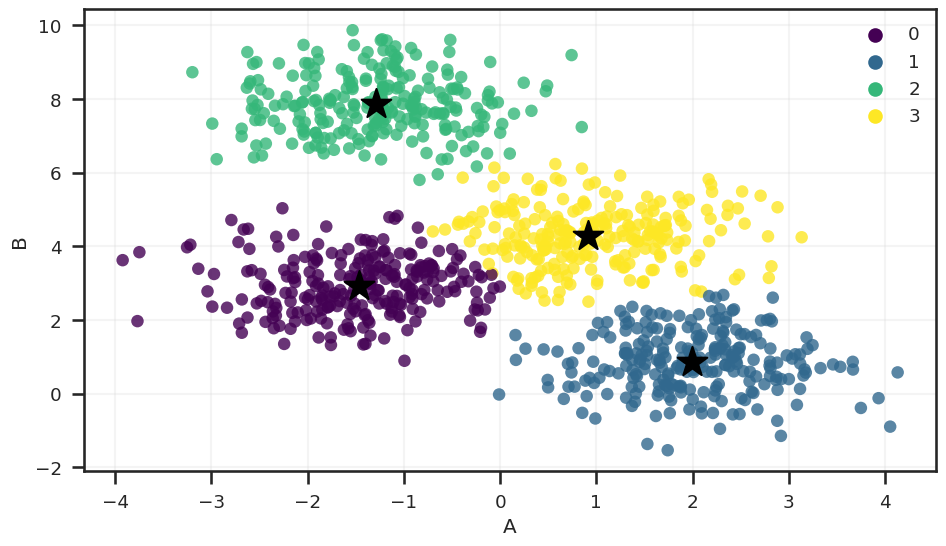

In [44]:
# Plot
labels = model.predict(X)
ax = sns.scatterplot(data=df, x='A', y='B', hue=labels, **scatter_kwargs)
ax.scatter(*model.means_.T, marker='*', color='black', s=500);

In [45]:
# Select best model by covariance type and K (Practical Statistics for Data Scientists)
results = []
k_range = range(2,11)
covariance_types = ['full', 'tied', 'diag', 'spherical']

for n_components in k_range:
  for covariance_type in covariance_types:
    mclust = GaussianMixture(n_components=n_components, warm_start=True, covariance_type=covariance_type)
    mclust.fit(X)
    results.append({
      'bic': mclust.bic(X),
      'n_components': n_components,
      'covariance_type': covariance_type,
    })

results = pd.DataFrame(results)
results

bic  n_components covariance_type
0   7976.527656             2            full
1   8165.511057             2            tied
2   8050.082533             2            diag
3   8036.917677             2       spherical
4   7526.427331             3            full
5   7736.189981             3            tied
6   7656.885783             3            diag
7   7666.916227             3       spherical
8   7475.928562             4            full
9   7419.260030             4            tied
10  7450.139988             4            diag
11  7426.425803             4       spherical
12  7518.161969             5            full
13  7440.644767             5            tied
14  7480.378982             5            diag
15  7453.356995             5       spherical
16  7542.697503             6            full
17  7461.028180             6            tied
18  7514.103284             6            diag
19  7484.216501             6       spherical
20  7586.950247             7            full
21  7480.947422             7            tied
22  7544.964240             7            diag
23  7505.552907             7       spherical
24  7614.847401             8            full
25  7506.939440             8            tied
26  7570.856672             8            diag
27  7526.420700             8       spherical
28  7660.199318             9            full
29  7517.082204             9            tied
30  7602.408019             9            diag
31  7552.812994             9       spherical
32  7692.777243            10            full
33  7533.468843            10            tied
34  7632.460738            10            diag
35  7576.862381            10       spherical

In [46]:
results.sort_values('bic').head()

bic  n_components covariance_type
9   7419.260030             4            tied
11  7426.425803             4       spherical
13  7440.644767             5            tied
10  7450.139988             4            diag
15  7453.356995             5       spherical

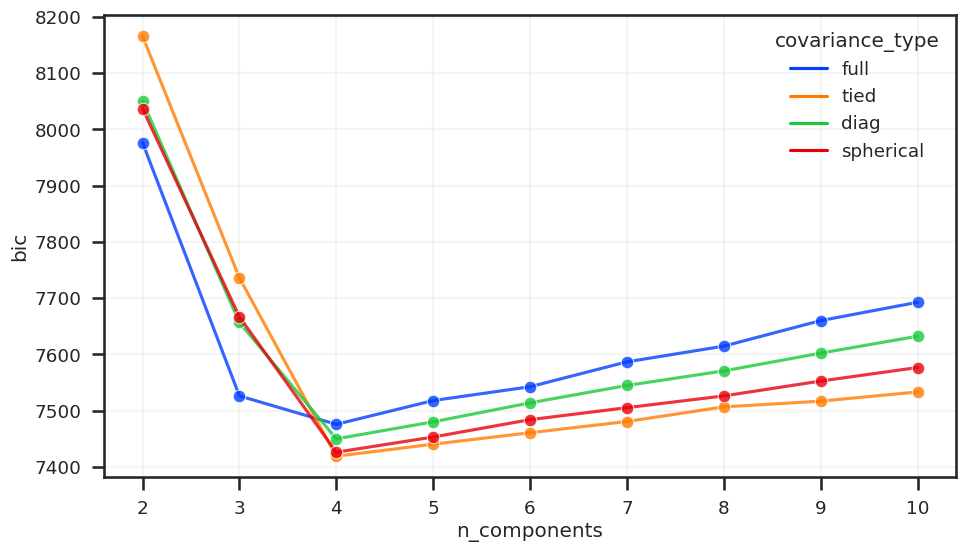

In [47]:
# Plot
sns.lineplot(data=results, x='n_components', y='bic', hue='covariance_type', marker='o', alpha=.8);

# WorldCup Case

## Load dataset

In [48]:
# Download and unzip files
!wget https://github.com/cmcouto-silva/datasets/raw/main/datasets/fifa-football-world-cup-dataset.zip
!unzip fifa-football-world-cup-dataset.zip

--2023-04-15 13:22:03--  https://github.com/cmcouto-silva/datasets/raw/main/datasets/fifa-football-world-cup-dataset.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/cmcouto-silva/datasets/main/datasets/fifa-football-world-cup-dataset.zip [following]
--2023-04-15 13:22:03--  https://raw.githubusercontent.com/cmcouto-silva/datasets/main/datasets/fifa-football-world-cup-dataset.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13531 (13K) [application/zip]
Saving to: ‘fifa-football-world-cup-dataset.zip’

fifa-football-world 100%[===================>]  13.21K  --.-KB/s    in 0s      

2023-04

In [49]:
# Listando arquivos com
files = glob.glob(r'FIFA - [1-2]*')
files

['FIFA - 1986.csv',
 'FIFA - 2018.csv',
 'FIFA - 1934.csv',
 'FIFA - 1966.csv',
 'FIFA - 1970.csv',
 'FIFA - 1994.csv',
 'FIFA - 1950.csv',
 'FIFA - 1990.csv',
 'FIFA - 2002.csv',
 'FIFA - 1982.csv',
 'FIFA - 2006.csv',
 'FIFA - 1930.csv',
 'FIFA - 2014.csv',
 'FIFA - 1962.csv',
 'FIFA - 1974.csv',
 'FIFA - 1978.csv',
 'FIFA - 1954.csv',
 'FIFA - 1938.csv',
 'FIFA - 1998.csv',
 'FIFA - 1958.csv',
 'FIFA - 2010.csv']

In [50]:
def read_csv_custom(file):
  df = pd.read_csv(file)
  df['Year'] = int(re.search('\d+', file).group())
  return df

In [51]:
df_teams = pd.concat([read_csv_custom(file) for file in files])
df_teams = df_teams.sort_values(['Year','Position'])
display(df_teams)

Position           Team  Games Played  Win  Draw  Loss  Goals For  \
0          1        Uruguay             4    4     0     0         15   
1          2      Argentina             5    4     0     1         18   
2          3  United States             3    2     0     1          7   
3          4     Yugoslavia             3    2     0     1          7   
4          5          Chile             3    2     0     1          5   
..       ...            ...           ...  ...   ...   ...        ...   
27        28     Costa Rica             3    0     1     2          2   
28        29        Iceland             3    0     1     2          2   
29        30        Morocco             3    0     1     2          2   
30        31          Egypt             3    0     0     3          2   
31        32         Panama             3    0     0     3          2   

    Goals Against Goal Difference  Points  Year  
0               3              12       8  1930  
1               9               9       8  1930  
2               6               1       4  1930  
3               7               0       4  1930  
4               3               2       4  1930  
..            ...             ...     ...   ...  
27              5              −3       1  2018  
28              5              −3       1  2018  
29              4              −2       1  2018  
30              6              −4       0  2018  
31             11              −9       0  2018  

[457 rows x 11 columns]

In [52]:
df_teams.Year.value_counts()

2018    32
2014    32
2010    32
2006    32
2002    32
1998    32
1982    24
1994    24
1990    24
1986    24
1978    16
1934    16
1974    16
1970    16
1966    16
1962    16
1958    16
1954    16
1938    15
1950    13
1930    13
Name: Year, dtype: int64

## Prepare data

Adicionando novas colunas para que os dados fiquem comparáveis:

In [53]:
df_teams = (
  df_teams
 .assign(**{
     'Win %': lambda x: x['Win'] / x['Games Played'],
     'Draw %': lambda x: x['Draw'] / x['Games Played'],
     'Loss %': lambda x: x['Loss'] / x['Games Played'],
     'Avg Goals For': lambda x: x['Goals For'] / x['Games Played'],
     'Avg Goals Against': lambda x: x['Goals Against'] / x['Games Played'],
 })
)

df_teams['Rank'] = df_teams.groupby('Year')['Position'].transform(lambda x: 1 - minmax_scale(x))
display(df_teams)

Position           Team  Games Played  Win  Draw  Loss  Goals For  \
0          1        Uruguay             4    4     0     0         15   
1          2      Argentina             5    4     0     1         18   
2          3  United States             3    2     0     1          7   
3          4     Yugoslavia             3    2     0     1          7   
4          5          Chile             3    2     0     1          5   
..       ...            ...           ...  ...   ...   ...        ...   
27        28     Costa Rica             3    0     1     2          2   
28        29        Iceland             3    0     1     2          2   
29        30        Morocco             3    0     1     2          2   
30        31          Egypt             3    0     0     3          2   
31        32         Panama             3    0     0     3          2   

    Goals Against Goal Difference  Points  Year     Win %    Draw %    Loss %  \
0               3              12       8  1930  1.000000  0.000000  0.000000   
1               9               9       8  1930  0.800000  0.000000  0.200000   
2               6               1       4  1930  0.666667  0.000000  0.333333   
3               7               0       4  1930  0.666667  0.000000  0.333333   
4               3               2       4  1930  0.666667  0.000000  0.333333   
..            ...             ...     ...   ...       ...       ...       ...   
27              5              −3       1  2018  0.000000  0.333333  0.666667   
28              5              −3       1  2018  0.000000  0.333333  0.666667   
29              4              −2       1  2018  0.000000  0.333333  0.666667   
30              6              −4       0  2018  0.000000  0.000000  1.000000   
31             11              −9       0  2018  0.000000  0.000000  1.000000   

    Avg Goals For  Avg Goals Against      Rank  
0        3.750000           0.750000  1.000000  
1        3.600000           1.800000  0.916667  
2        2.333333           2.000000  0.833333  
3        2.333333           2.333333  0.750000  
4        1.666667           1.000000  0.666667  
..            ...                ...       ...  
27       0.666667           1.666667  0.129032  
28       0.666667           1.666667  0.096774  
29       0.666667           1.333333  0.064516  
30       0.666667           2.000000  0.032258  
31       0.666667           3.666667  0.000000  

[457 rows x 17 columns]

Agrupando os dados por time, considerando apeans aquelas com mais de 3 copas:

In [54]:
df_teams_stats = df_teams.groupby(['Team']).agg(
  n_cups = ('Team', 'count'),
  avg_wins = ('Win %', 'mean'),
  avg_draws = ('Draw %', 'mean'),
  avg_losses = ('Loss %', 'mean'),
  avg_goals_for = ('Avg Goals For', 'mean'),
  avg_goals_against = ('Avg Goals Against', 'mean'),
  avg_rank = ('Rank', 'mean')
)

df_teams_stats = df_teams_stats.query('n_cups > 3')
display(df_teams_stats)

n_cups  avg_wins  avg_draws  avg_losses  avg_goals_for  \
Team                                                                     
Algeria              4  0.229167   0.229167    0.541667       0.937500   
Argentina           17  0.481653   0.173950    0.344398       1.670588   
Australia            5  0.116667   0.250000    0.633333       0.783333   
Austria              7  0.361905   0.171429    0.466667       1.378571   
Belgium             13  0.302015   0.191209    0.506777       1.356410   
Brazil              21  0.626871   0.145805    0.227324       2.073016   
Bulgaria             6  0.071429   0.329365    0.599206       0.599206   
Cameroon             7  0.133333   0.333333    0.533333       0.723810   
Chile                9  0.296296   0.222222    0.481481       1.166667   
Colombia             6  0.369444   0.138889    0.491667       1.372222   
Costa Rica           5  0.246667   0.253333    0.500000       1.066667   
Croatia              5  0.390476   0.190476    0.419048       1.380952   
Czechoslovakia       8  0.304167   0.177083    0.518750       1.333333   
Denmark              5  0.446667   0.240000    0.313333       1.460000   
England             15  0.390476   0.303651    0.305873       1.296032   
France              15  0.414603   0.165714    0.419683       1.650794   
Germany              9  0.587037   0.147619    0.265344       1.908201   
Hungary              9  0.440741   0.092593    0.466667       2.562963   
Iran                 5  0.133333   0.266667    0.600000       0.600000   
Italy               18  0.489021   0.241799    0.269180       1.549206   
Japan                6  0.208333   0.236111    0.555556       0.902778   
Mexico              16  0.245833   0.228125    0.526042       1.017708   
Morocco              5  0.116667   0.300000    0.583333       0.883333   
Netherlands         10  0.424286   0.214286    0.361429       1.510000   
Nigeria              6  0.263889   0.152778    0.583333       1.055556   
Paraguay             8  0.264583   0.335417    0.400000       1.127083   
Peru                 5  0.233333   0.166667    0.600000       1.050000   
Poland               8  0.379464   0.105655    0.514881       1.555060   
Portugal             7  0.414966   0.210884    0.374150       1.583333   
Romania              7  0.311905   0.207143    0.480952       1.404762   
Russia               4  0.266667   0.266667    0.466667       1.633333   
Saudi Arabia         5  0.166667   0.133333    0.700000       0.650000   
Scotland             8  0.166667   0.291667    0.541667       1.041667   
South Korea         10  0.134524   0.253571    0.611905       0.930952   
Soviet Union         7  0.471429   0.192857    0.335714       1.735714   
Spain               15  0.454921   0.248889    0.296190       1.598413   
Sweden              12  0.341270   0.232937    0.425794       1.531349   
Switzerland         11  0.318182   0.204545    0.477273       1.348485   
Tunisia              5  0.133333   0.266667    0.600000       0.866667   
United States       10  0.215000   0.153333    0.631667       1.098333   
Uruguay             13  0.403480   0.227106    0.369414       1.526007   
West Germany        10  0.576190   0.227381    0.196429       2.102381   
Yugoslavia           8  0.439583   0.212500    0.347917       1.627083   

                avg_goals_against  avg_rank  
Team                                         
Algeria                  1.437500  0.318724  
Argentina                1.322269  0.699798  
Australia                1.966667  0.246022  
Austria                  1.611905  0.511454  
Belgium                  1.924359  0.494288  
Brazil                   1.079138  0.803850  
Bulgaria                 2.011905  0.292941  
Cameroon                 1.876190  0.253657  
Chile                    1.509259  0.494966  
Colombia                 1.480556  0.458875  
Costa Rica               1.713333  0.366620  
Croatia                  1.200000  0.587097  
Czechoslovakia           1.666667  0.5309

Verificando outliers:

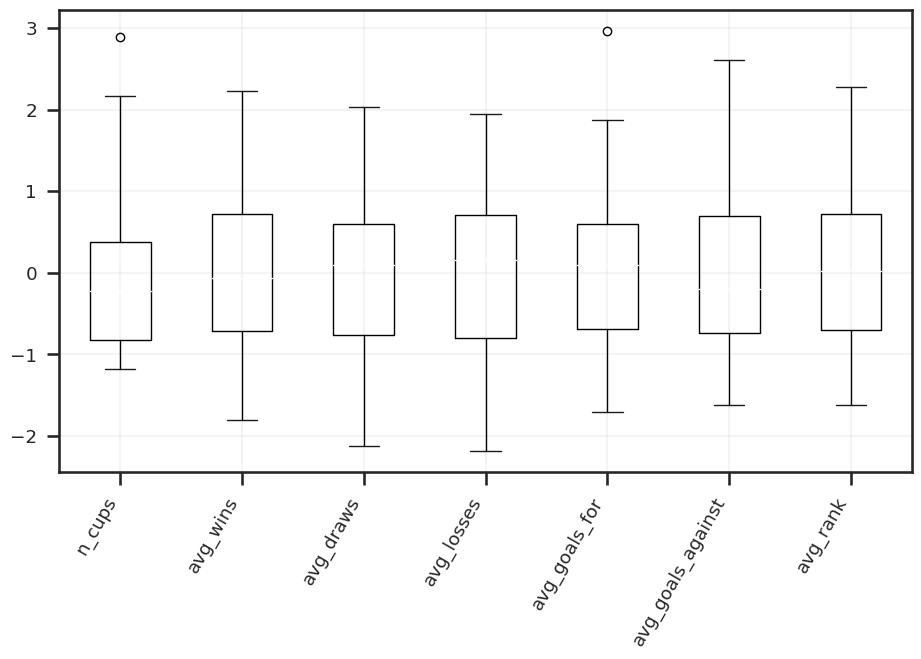

In [55]:
df_teams_stats.apply(scale).boxplot()
plt.xticks(rotation=60, ha='right')
plt.show()

Limitando outliers para no máximo 3 desvios padrões:

In [56]:
for col in df_teams_stats.columns:
  avg,std = df_teams_stats[col].agg(['mean','std'])
  df_teams_stats[col] = df_teams_stats[col].clip(lower=avg-3*std, upper=avg+3*std) # capping | clipping

Normalizando valores para para uma mesma escala (menor valor será -1 e maior 1):

In [57]:
scaler = MinMaxScaler(feature_range=(-1,1))

X = df_teams_stats.copy()
X[:] = scaler.fit_transform(X)

print('Scaled dataset')
display(X.head())

print('\nDataset stats')
display(X.describe())

Scaled dataset


n_cups  avg_wins  avg_draws  avg_losses  avg_goals_for  \
Team                                                                  
Algeria   -1.000000 -0.432027   0.124881    0.371158      -0.655463   
Argentina  0.529412  0.477108  -0.329910   -0.412321       0.091155   
Australia -0.882353 -0.837110   0.296473    0.735225      -0.812475   
Austria   -0.647059  0.045928  -0.350674    0.073286      -0.206251   
Belgium    0.058824 -0.169721  -0.187756    0.232588      -0.228821   

           avg_goals_against  avg_rank  
Team                                    
Algeria            -0.414571 -0.684617  
Argentina          -0.567985  0.463290  
Australia           0.289941 -0.903618  
Austria            -0.182375 -0.104057  
Belgium             0.233614 -0.155766


Dataset stats


n_cups   avg_wins  avg_draws  avg_losses  avg_goals_for  \
count  43.000000  43.000000  43.000000   43.000000      43.000000   
mean   -0.417237  -0.103023   0.025020    0.056418      -0.268521   
std     0.497119   0.502087   0.486581    0.489534       0.432345   
min    -1.000000  -1.000000  -1.000000   -1.000000      -1.000000   
25%    -0.823529  -0.457532  -0.340292   -0.328823      -0.561574   
50%    -0.529412  -0.134109   0.067684    0.130024      -0.228821   
75%    -0.235294   0.253766   0.310200    0.398739      -0.012108   
max     1.000000   1.000000   1.000000    1.000000       1.000000   

       avg_goals_against   avg_rank  
count          43.000000  43.000000  
mean           -0.233616  -0.166546  
std             0.477895   0.517398  
min            -1.000000  -1.000000  
25%            -0.583760  -0.526944  
50%            -0.328455  -0.153722  
75%             0.094495   0.199024  
max             1.000000   1.000000

## Modeling

### Clusterização hierárquica

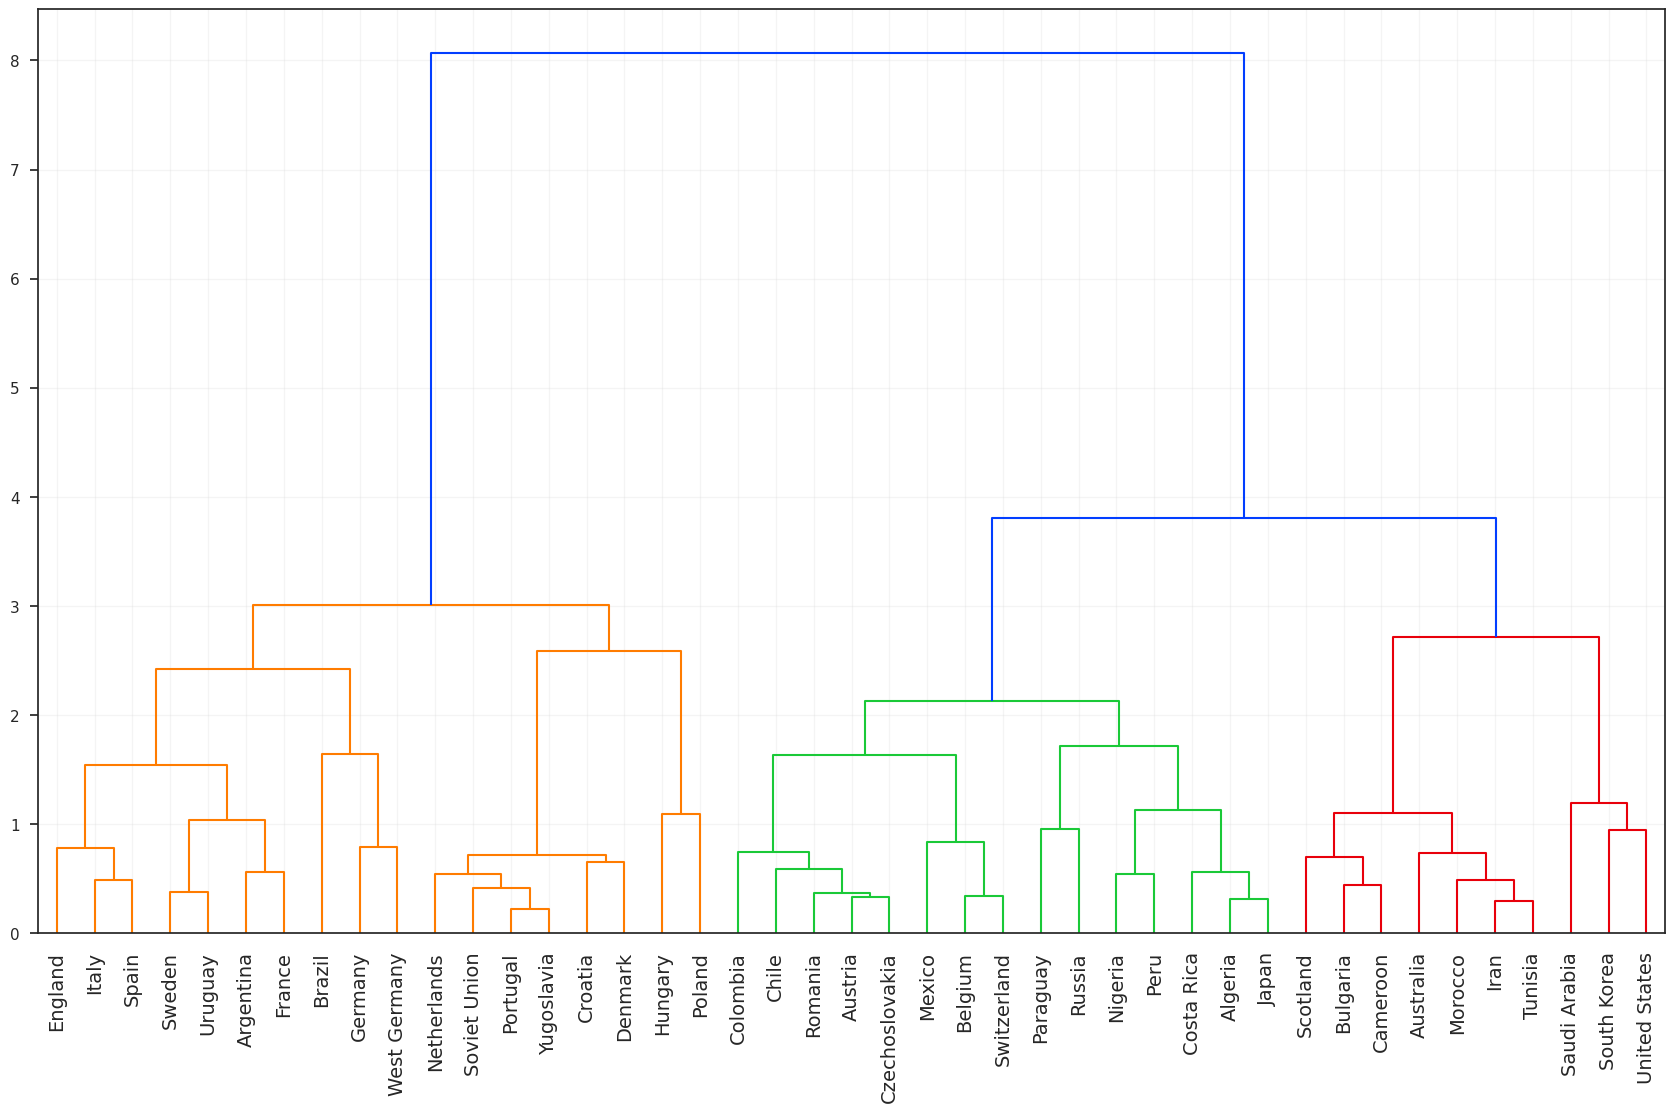

In [ ]:
plt.figure(figsize=(21,12))
Z = linkage(X, method='ward')
dendrogram_dict = dendrogram(Z, labels=X.index, color_threshold=3.5)
plt.xticks(fontsize=14)
plt.show()

In [ ]:
@interact(metric=['distortion','silhouette','calinski_harabasz'])
def kplot(metric):
  kelbow_visualizer(AgglomerativeClustering(), X, timings=False, metric=metric)
  plt.show()

interactive(children=(Dropdown(description='metric', options=('distortion', 'silhouette', 'calinski_harabasz')…

In [ ]:
labels = fcluster(Z, 3, criterion='maxclust')

(
  df_teams_stats.assign(cluster=labels)
  .groupby('cluster')
  .mean()
  .transpose()
  .style.background_gradient(cmap='Reds', axis=1)
)

In [ ]:
df_teams_stats.assign(cluster=labels)

n_cups  avg_wins  avg_draws  avg_losses  avg_goals_for  \
Team                                                                     
Algeria              4  0.229167   0.229167    0.541667       0.937500   
Argentina           17  0.481653   0.173950    0.344398       1.670588   
Australia            5  0.116667   0.250000    0.633333       0.783333   
Austria              7  0.361905   0.171429    0.466667       1.378571   
Belgium             13  0.302015   0.191209    0.506777       1.356410   
Brazil              21  0.626871   0.145805    0.227324       2.073016   
Bulgaria             6  0.071429   0.329365    0.599206       0.599206   
Cameroon             7  0.133333   0.333333    0.533333       0.723810   
Chile                9  0.296296   0.222222    0.481481       1.166667   
Colombia             6  0.369444   0.138889    0.491667       1.372222   
Costa Rica           5  0.246667   0.253333    0.500000       1.066667   
Croatia              5  0.390476   0.190476    0.419048       1.380952   
Czechoslovakia       8  0.304167   0.177083    0.518750       1.333333   
Denmark              5  0.446667   0.240000    0.313333       1.460000   
England             15  0.390476   0.303651    0.305873       1.296032   
France              15  0.414603   0.165714    0.419683       1.650794   
Germany              9  0.587037   0.147619    0.265344       1.908201   
Hungary              9  0.440741   0.092593    0.466667       2.562963   
Iran                 5  0.133333   0.266667    0.600000       0.600000   
Italy               18  0.489021   0.241799    0.269180       1.549206   
Japan                6  0.208333   0.236111    0.555556       0.902778   
Mexico              16  0.245833   0.228125    0.526042       1.017708   
Morocco              5  0.116667   0.300000    0.583333       0.883333   
Netherlands         10  0.424286   0.214286    0.361429       1.510000   
Nigeria              6  0.263889   0.152778    0.583333       1.055556   
Paraguay             8  0.264583   0.335417    0.400000       1.127083   
Peru                 5  0.233333   0.166667    0.600000       1.050000   
Poland               8  0.379464   0.105655    0.514881       1.555060   
Portugal             7  0.414966   0.210884    0.374150       1.583333   
Romania              7  0.311905   0.207143    0.480952       1.404762   
Russia               4  0.266667   0.266667    0.466667       1.633333   
Saudi Arabia         5  0.166667   0.133333    0.700000       0.650000   
Scotland             8  0.166667   0.291667    0.541667       1.041667   
South Korea         10  0.134524   0.253571    0.611905       0.930952   
Soviet Union         7  0.471429   0.192857    0.335714       1.735714   
Spain               15  0.454921   0.248889    0.296190       1.598413   
Sweden              12  0.341270   0.232937    0.425794       1.531349   
Switzerland         11  0.318182   0.204545    0.477273       1.348485   
Tunisia              5  0.133333   0.266667    0.600000       0.866667   
United States       10  0.215000   0.153333    0.631667       1.098333   
Uruguay             13  0.403480   0.227106    0.369414       1.526007   
West Germany        10  0.576190   0.227381    0.196429       2.102381   
Yugoslavia           8  0.439583   0.212500    0.347917       1.627083   

                avg_goals_against  avg_rank  cluster  
Team                                                  
Algeria                  1.437500  0.318724        2  
Argentina                1.322269  0.699798        1  
Australia                1.966667  0.246022        3  
Austria                  1.611905  0.511454        2  
Belgium                  1.924359  0.494288        2  
Brazil                   1.079138  0.803850        1  
Bulgaria                 2.011905  0.292941        3  
Cameroon                 1.876190  0.253657        3  
Chile                    1.509259  0.494966        2  
Colombia                 1.480556  0.458875        2  
Costa Rica               

### K-Means

In [ ]:
@interact(metric=['distortion','silhouette','calinski_harabasz'])
def kplot(metric):
  kelbow_visualizer(KMeans(), X, timings=False, metric=metric)
  plt.show()

interactive(children=(Dropdown(description='metric', options=('distortion', 'silhouette', 'calinski_harabasz')…

In [ ]:
cluster_metrics_results = []
cluster_metrics = silhouette_score, davies_bouldin_score, calinski_harabasz_score

for k in range(2,11):
  model = AgglomerativeClustering(n_clusters=k)
  labels = model.fit_predict(X)
  cluster_results_dict = {'k':k}
  for metric in cluster_metrics:
    cluster_results_dict[metric.__name__] = metric(X, labels)
  cluster_metrics_results.append(cluster_results_dict)

pd.DataFrame(cluster_metrics_results).set_index('k').style.background_gradient(cmap='Blues')

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



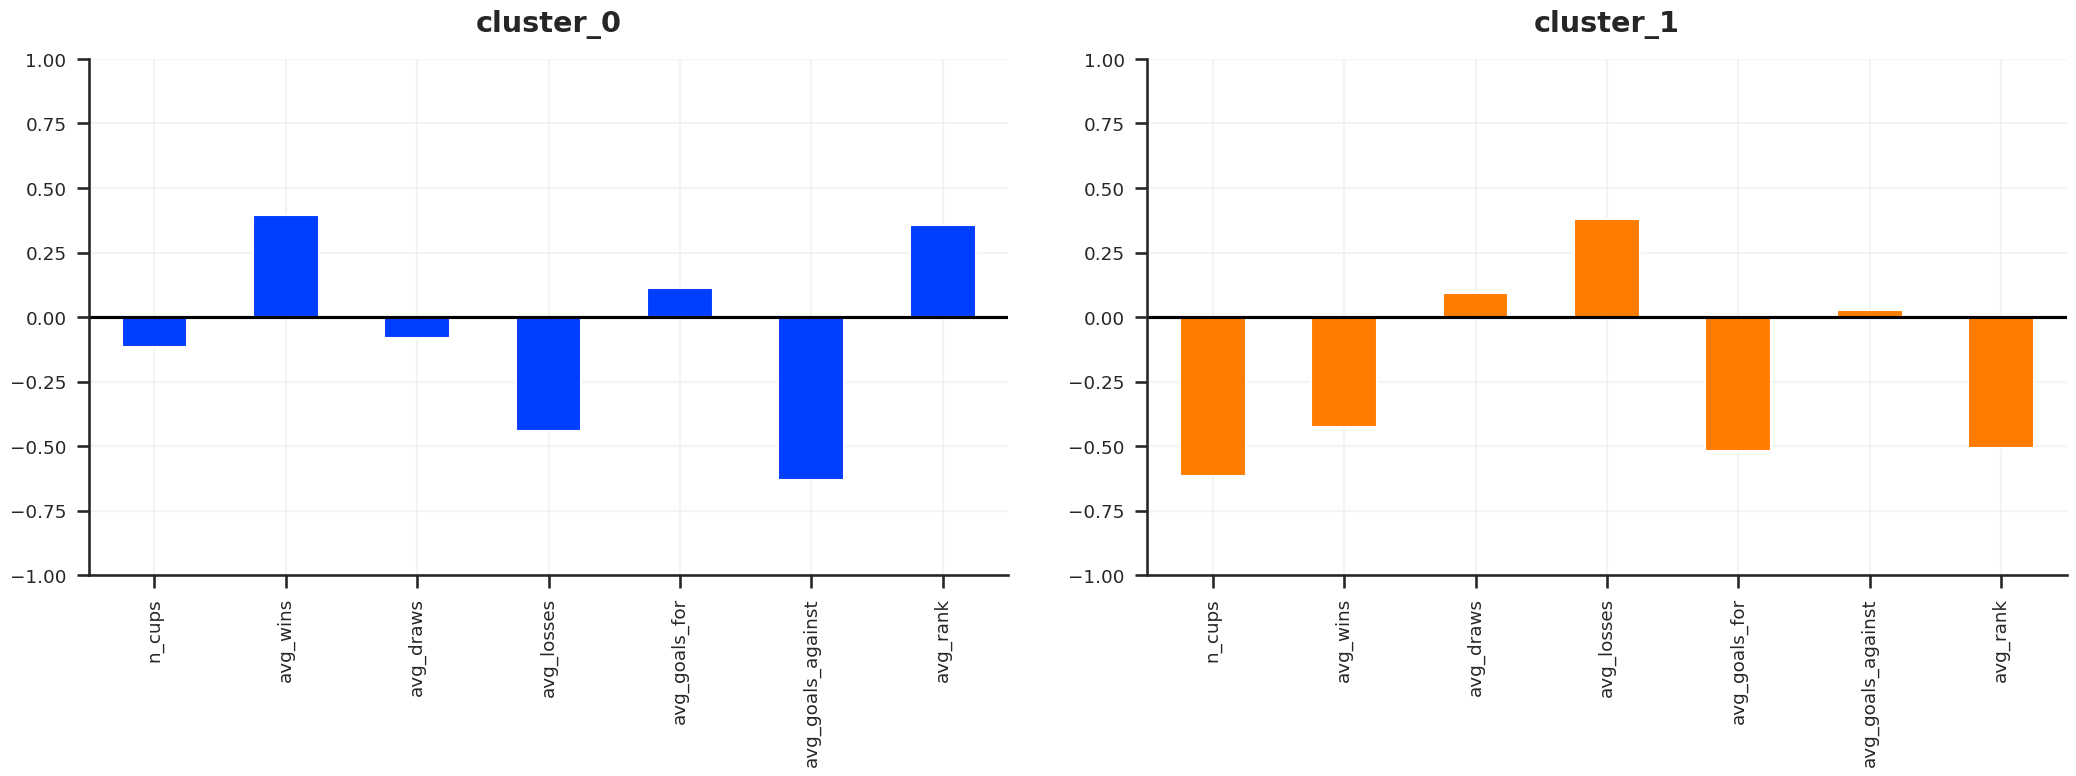

In [ ]:
# Treinando modelo e capturando clusters
model = KMeans(n_clusters=2, random_state=2023)
labels = model.fit_predict(X)

# Interpretando cluster via centroides
axes = (
  pd.DataFrame(model.cluster_centers_, columns=X.columns)
  .T
 .add_prefix('cluster_')
 .plot.bar(subplots=True, legend=False, ylim=(-1,1), figsize=(21,8), layout=(1,2))
)

for ax in axes[0]:
  ax.axhline(y=0, color='black')

plt.tight_layout(w_pad=3)
sns.despine()
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



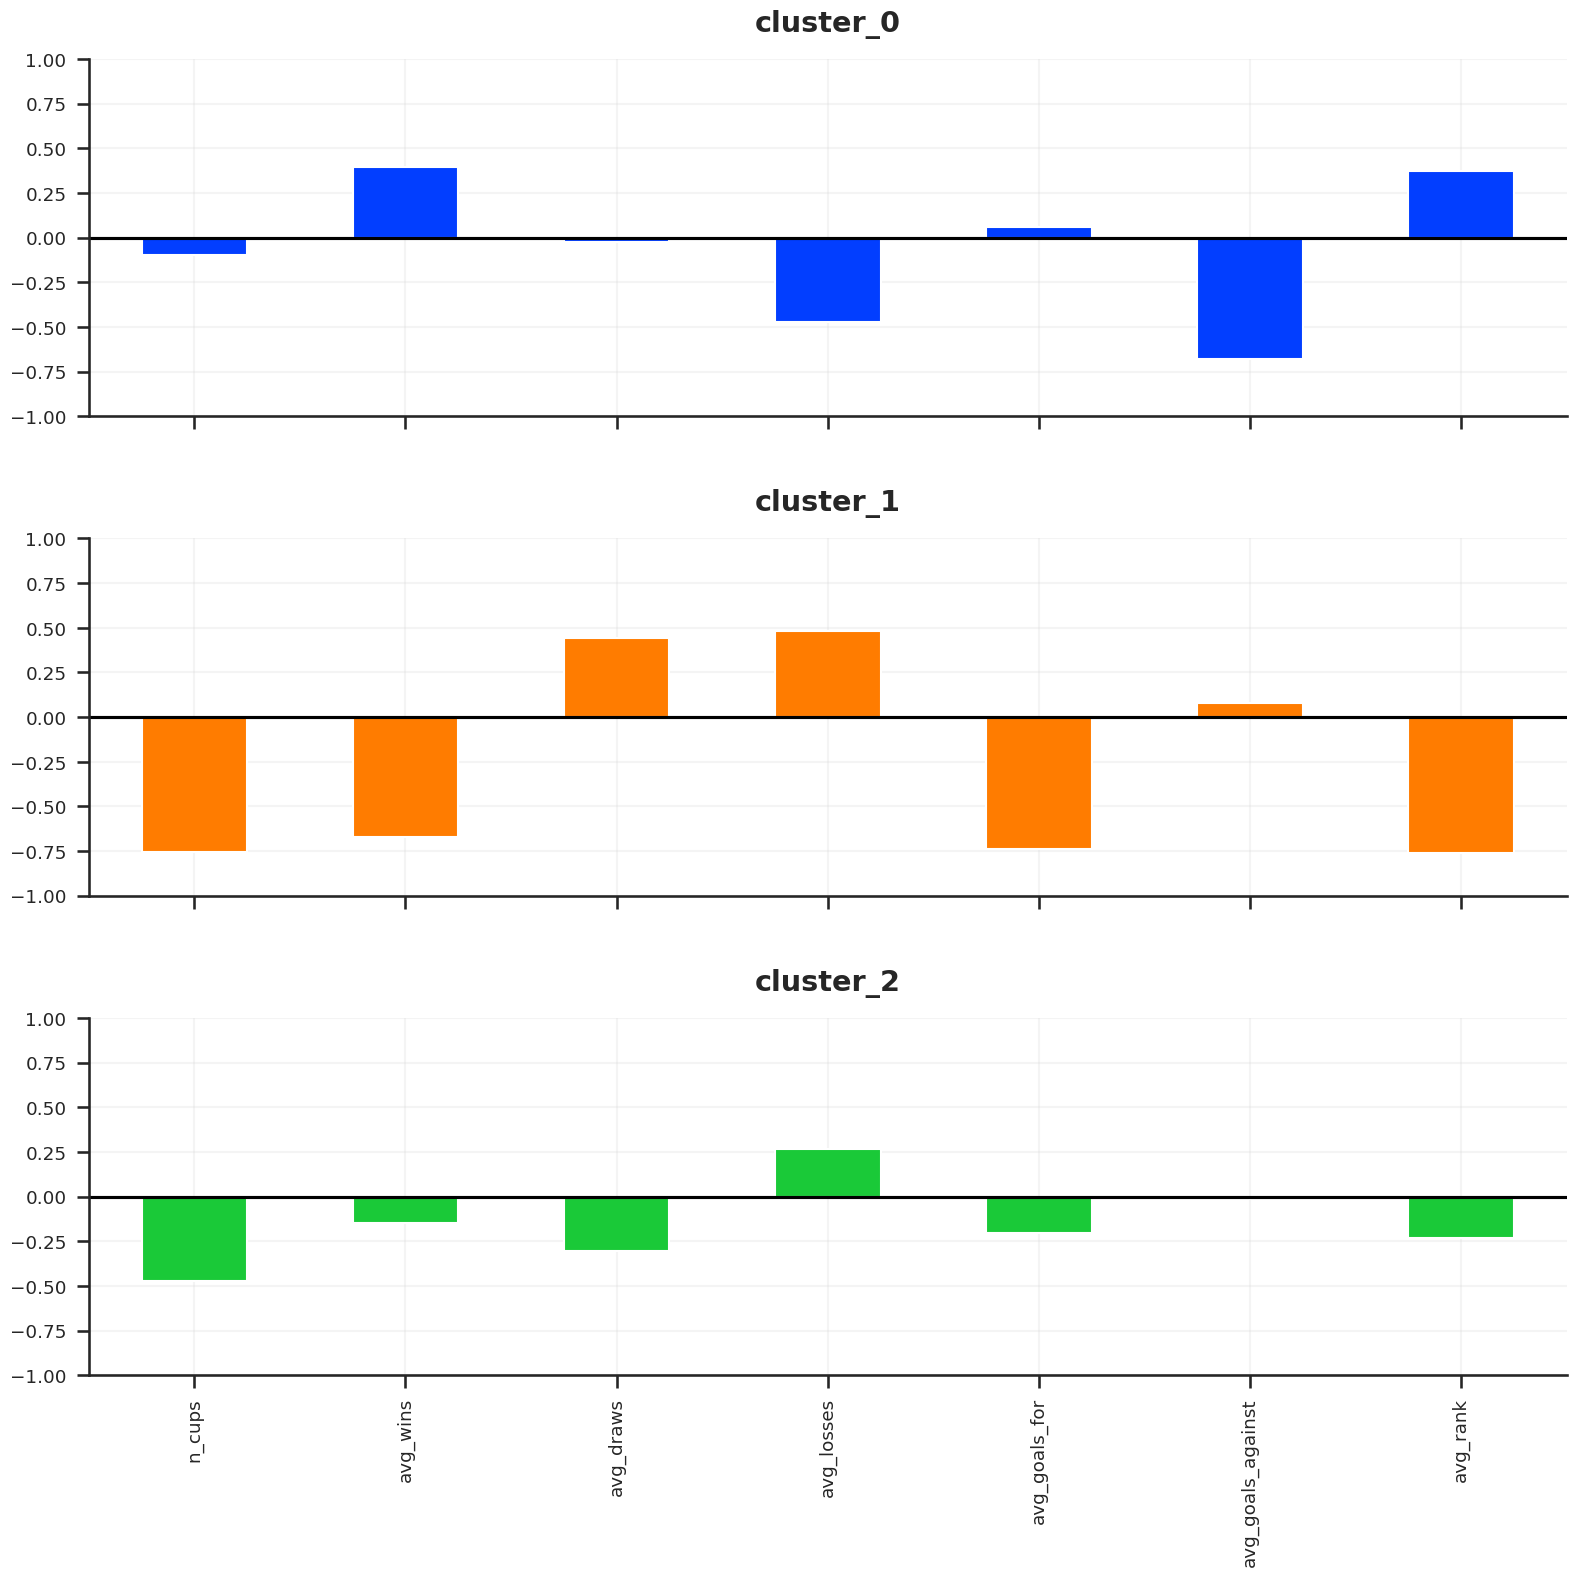

In [ ]:
# Treinando modelo e capturando clusters
model = KMeans(n_clusters=3, random_state=2023)
labels = model.fit_predict(X)

# Interpretando cluster via centroides
axes = (
  pd.DataFrame(model.cluster_centers_, columns=X.columns)
  .T
 .add_prefix('cluster_')
 .plot.bar(subplots=True, figsize=(16,16), legend=False, ylim=(-1,1))
)

for ax in axes:
  ax.axhline(y=0, color='black')

plt.tight_layout(h_pad=3)
sns.despine()
plt.show()

# Wine dataset

## Carregando dados

In [ ]:
df_wines,_ = datasets.load_wine(as_frame=True, return_X_y=True)
df_wines

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     od280/od315_of_diluted_wines  proline  
0                            3.92   1065.0  
1                            3.40   1050.0  
2                            3.17   1185.0  
3                            3.45   1480.0  
4                            2.93    735.0  
..                            ...      ...  
173                          1.74    740.0  
174                          1.56    750.0  
175                          1.56    835.0  
176                          1.62    840.0  
177                          1.60    560.0  

[178 rows x 13 columns]

## Data cleaning

Há dados duplicados?

In [ ]:
df_wines.duplicated().sum()

0

Há dados faltantes?

In [ ]:
df_wines.isna().sum().sum()

0

Há outliers?

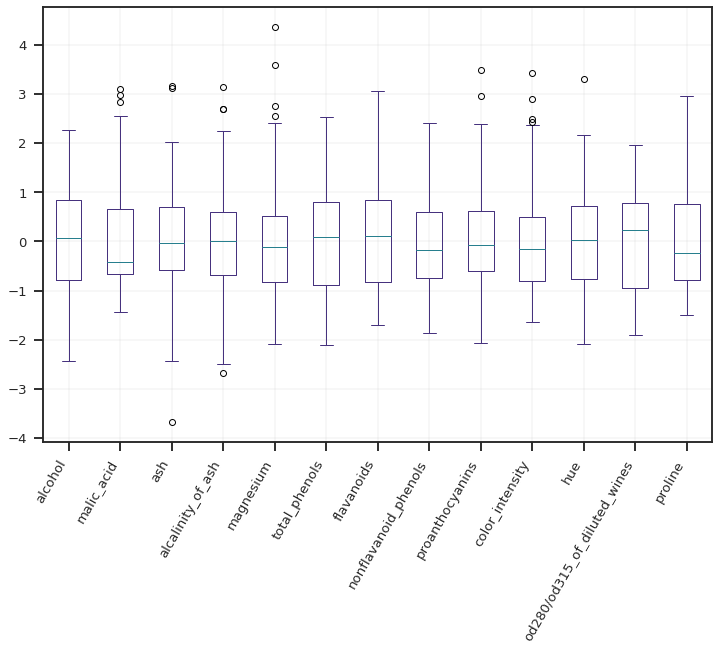

In [ ]:
# Scaling
df_wines_scaled = df_wines.apply(scale)
# Plot
df_wines_scaled.plot.box()
plt.xticks(rotation=60, ha='right');

Identificando e removendo linhas com outliers (|Z-score| > 3):

In [ ]:
outlier_rows = (df_wines_scaled.abs()>3).any(axis=1)
outlier_rows.sum()

10

In [ ]:
df_wines_scaled = df_wines_scaled[~outlier_rows]

In [ ]:
df_wines_scaled.head()

alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
0  1.518613   -0.562250  0.232053          -1.169593   1.913905   
1  0.246290   -0.499413 -0.827996          -2.490847   0.018145   
2  0.196879    0.021231  1.109334          -0.268738   0.088358   
3  1.691550   -0.346811  0.487926          -0.809251   0.930918   
4  0.295700    0.227694  1.840403           0.451946   1.281985   

   total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
0       0.808997    1.034819             -0.659563         1.224884   
1       0.568648    0.733629             -0.820719        -0.544721   
2       0.808997    1.215533             -0.498407         2.135968   
3       2.491446    1.466525             -0.981875         1.032155   
4       0.808997    0.663351              0.226796         0.401404   

   color_intensity       hue  od280/od315_of_diluted_wines   proline  
0         0.251717  0.362177                      1.847920  1.013009  
1        -0.293321  0.406051                      1.113449  0.965242  
2         0.269020  0.318304                      0.788587  1.395148  
3         1.186068 -0.427544                      1.184071  2.334574  
4        -0.319276  0.362177                      0.449601 -0.037874

## Verificando melhor K

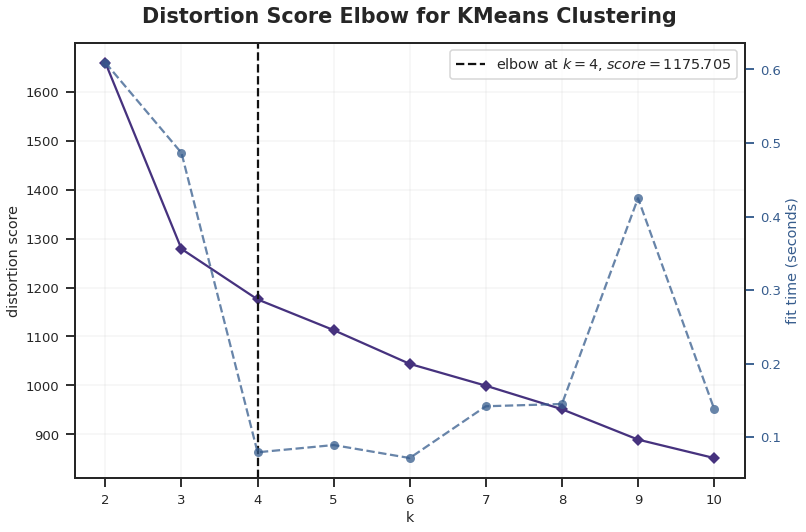

In [ ]:
visualizer = KElbowVisualizer(KMeans(random_state=0), k=(2,11))
visualizer.fit(df_wines_scaled).show();

## Clusterizando

Criando e treinando modelo

In [ ]:
kmeans = KMeans(4, random_state=0).fit(df_wines_scaled)

Salvando centroides e labels

In [ ]:
centroids = kmeans.cluster_centers_
labels = kmeans.predict(df_wines_scaled)

## Interpretando clusters

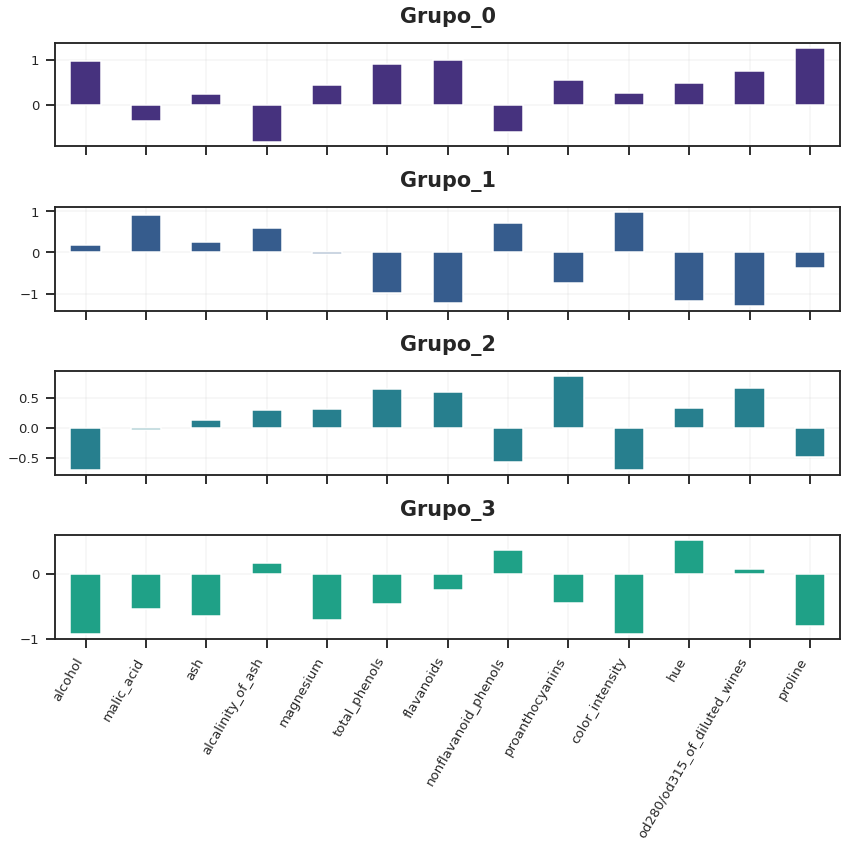

In [ ]:
pd.DataFrame(centroids, columns=df_wines.columns).T.add_prefix('Grupo_').plot.bar(subplots=True, figsize=(12,12), legend=False)
plt.xticks(rotation=60, ha='right')
plt.tight_layout();

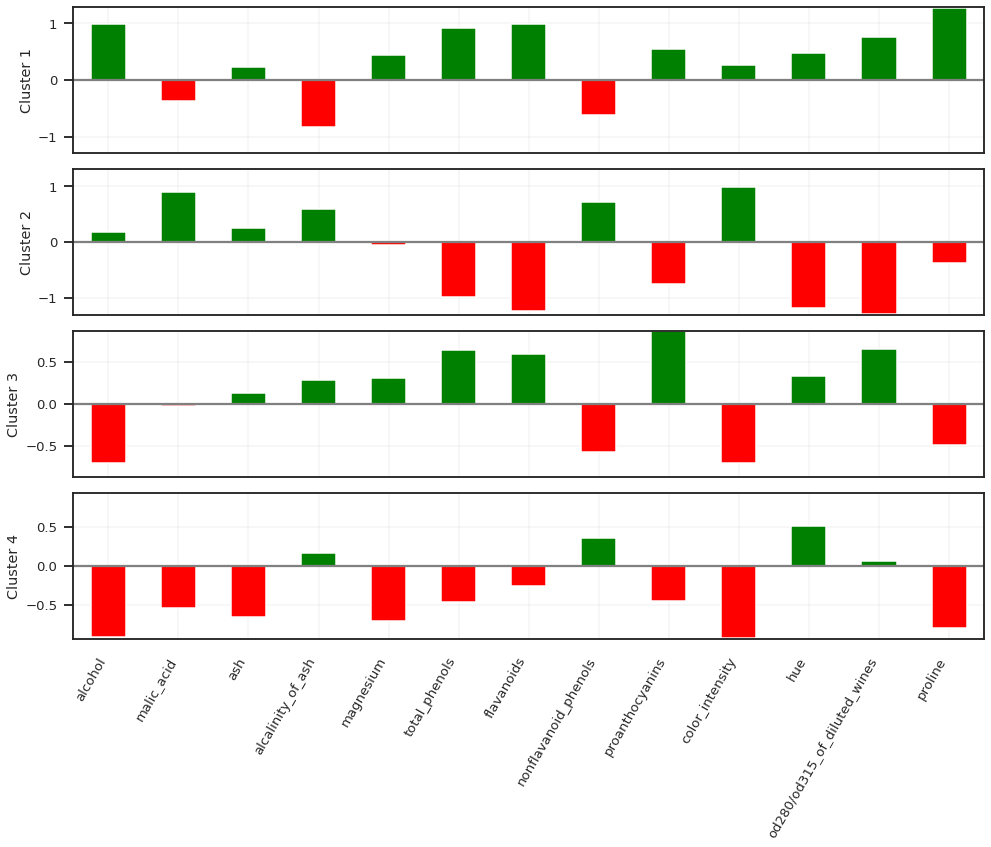

In [ ]:
# Adaptado do livro "Practical Statistics for Data Scientists"
fig,axes = plt.subplots(nrows=4, figsize=(14,12), sharex=True)

for i,ax in enumerate(axes):
  center = centers.loc[i,:]
  maxPC = 1.01 * center.abs().max()
  colors = ['green' if l > 0 else 'red' for l in center]
  center.plot.bar(ax=ax, color=colors)
  ax.set_ylabel(f'Cluster {i+1}')
  ax.set_ylim(-maxPC, maxPC)
  ax.axhline(color='gray')
  ax.xaxis.set_ticks_position('none') 

plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
(
    df_wines[~outlier_rows].assign(cluster=labels)
    .groupby('cluster')
    .agg(['mean','min','median','max'])
)

alcohol                       malic_acid                     \
              mean    min  median    max       mean   min median   max   
cluster                                                                  
0        13.795926  12.85  13.795  14.83   1.933333  1.35  1.740  4.04   
1        13.126875  12.20  13.135  14.16   3.379167  1.24  3.285  5.65   
2        12.444583  11.45  12.370  13.86   2.222500  0.89  1.900  4.43   
3        12.281905  11.41  12.195  13.67   1.756667  0.74  1.610  4.30   

              ash        ...    hue       od280/od315_of_diluted_wines        \
             mean   min  ... median   max                         mean   min   
cluster                  ...                                                   
0        2.430370  2.04  ...   1.07  1.28                     3.145185  2.51   
1        2.429167  2.10  ...   0.67  0.96                     1.684583  1.27   
2        2.395000  1.70  ...   1.04  1.42                     3.055000  2.26   
3        2.207381  1.70  ...   1.03  1.45                     2.671667  1.59   

                          proline                         
        median   max         mean    min  median     max  
cluster                                                   
0        3.135  4.00  1147.537037  760.0  1112.5  1680.0  
1        1.660  2.47   626.875000  415.0   622.5   880.0  
2        3.125  3.82   564.125000  290.0   572.5   886.0  
3        2.730  3.57   497.309524  278.0   484.0   870.0  

[4 rows x 52 columns]

In [ ]:
(
    df_wines[~outlier_rows].assign(cluster=labels)
    .groupby('cluster')
    .mean()
    .transpose()
    .style.background_gradient(axis=1, cmap='YlOrRd')
)

# Dataset with mix data

**Clustering com dados categóricos:**
- kmodes (apenas dados categóricos)
- kprototypes (dados numéricos e categóricos)
- hierarquical clustering com Glower' distance

**Análises de associação / redução de dimensionalidade:**
- Análise de correspondência simples (CA) - apenas dados categóricos com 2 variáveis
- Análise de correspondência múltipla (MCA) - apenas dados categóricos com 2 ou mais variáveis
- FAMD - dados mistos

## Dados categóricos

In [ ]:
from yellowbrick.datasets import load_mushroom

In [ ]:
df_mushroom = load_mushroom()[0]
df_mushroom

shape surface   color
0      convex  smooth  yellow
1        bell  smooth   white
2      convex   scaly   white
3      convex  smooth    gray
4      convex   scaly  yellow
...       ...     ...     ...
8118  knobbed  smooth   brown
8119   convex  smooth   brown
8120     flat  smooth   brown
8121  knobbed   scaly   brown
8122   convex  smooth   brown

[8123 rows x 3 columns]

In [ ]:
kmodes_model = KModes(n_clusters=3)
labels = kmodes_model.fit_predict(df_mushroom)
print(labels)
print(kmodes_model.cost_)

[0 1 0 ... 1 0 0]
10343.0


In [ ]:
custos = [KModes(n_clusters=k).fit(df_mushroom).cost_ for k in range(2,11)]

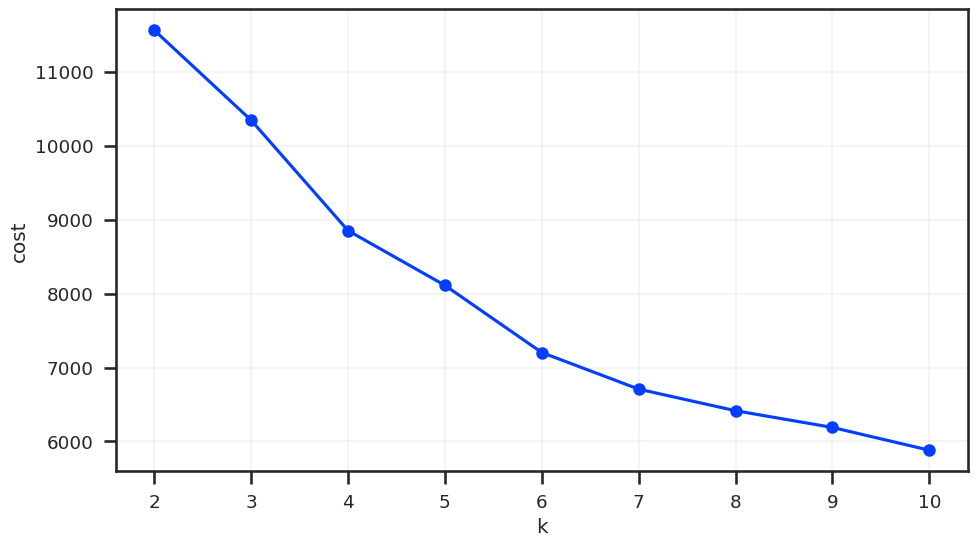

In [ ]:
ax = pd.Series(custos, index=range(2,11)).plot(marker='o')
ax.set(xlabel='k', ylabel='cost');

## Dados mistos

In [ ]:
df_diabetes = pd.read_csv('https://raw.githubusercontent.com/Ekeany/Clustering-Mixed-Data/main/data/heart.csv')
df_diabetes = df_diabetes.drop(columns='target')
df_diabetes

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0     2  
3        2   0     2  
4        2   0     2  
..     ...  ..   ...  
298      1   0     3  
299      1   0     3  
300      1   2     3  
301      1   1     3  
302      1   1     2  

[303 rows x 13 columns]

In [ ]:
# Padroniza dados numéricos
numerical_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df_diabetes[numerical_columns] = df_diabetes[numerical_columns].apply(scale)

In [ ]:
# Define posições dos dados categóricos
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
categorical_idx = df_diabetes.columns.isin(categorical_columns).nonzero()[0].tolist()

In [ ]:
# Modelo
kproto_model = KPrototypes()
kproto_model.fit_predict(df_diabetes, categorical=categorical_idx)

array([3, 3, 5, 6, 0, 2, 0, 5, 2, 2, 2, 6, 6, 7, 2, 5, 0, 7, 5, 2, 2, 5,
       5, 2, 5, 2, 2, 7, 0, 2, 5, 7, 5, 6, 1, 5, 6, 2, 2, 0, 0, 6, 3, 6,
       6, 6, 5, 6, 7, 6, 6, 6, 1, 5, 2, 2, 5, 6, 5, 6, 7, 6, 5, 5, 2, 5,
       5, 5, 5, 2, 6, 5, 5, 6, 5, 6, 3, 2, 5, 6, 5, 6, 6, 2, 6, 0, 2, 5,
       5, 7, 5, 2, 2, 6, 5, 7, 0, 6, 6, 6, 5, 4, 2, 5, 5, 7, 4, 6, 6, 6,
       4, 2, 0, 5, 6, 5, 5, 3, 5, 6, 1, 6, 5, 6, 5, 5, 5, 2, 5, 7, 2, 6,
       6, 5, 6, 6, 7, 7, 7, 1, 6, 6, 5, 7, 7, 2, 5, 2, 5, 5, 4, 7, 4, 2,
       5, 7, 5, 5, 7, 6, 6, 0, 5, 5, 5, 4, 1, 3, 1, 3, 1, 5, 6, 3, 1, 1,
       6, 0, 3, 1, 1, 7, 0, 3, 3, 6, 1, 1, 2, 5, 1, 1, 7, 1, 3, 4, 3, 2,
       1, 6, 5, 1, 1, 4, 3, 6, 1, 3, 3, 2, 6, 3, 5, 4, 1, 1, 1, 1, 1, 6,
       0, 3, 2, 4, 1, 7, 1, 5, 4, 1, 5, 4, 4, 1, 1, 6, 6, 6, 0, 6, 4, 4,
       1, 1, 1, 6, 0, 4, 4, 1, 3, 6, 1, 1, 4, 6, 1, 1, 2, 3, 4, 6, 1, 6,
       7, 7, 4, 7, 1, 1, 6, 3, 7, 6, 1, 5, 1, 6, 0, 3, 1, 5, 1, 5, 1, 1,
       2, 2, 1, 1, 2, 3, 4, 2, 3, 3, 7, 7, 7, 6, 3,

In [ ]:
# custo
kproto_model.cost_

1066.1191983275144